# Chapter 07 -- Pandas, Part2
 

## Topics Covered

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#SAS-Sort-Merge-with-by-group">SAS Sort Merge with by-group </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Inner-Join">Inner Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Right-Outer-Join">Right Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Left-Outer-Join">Left Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Full-Outer-Join">Full Outer Join </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Outer-Join-no-Matched-Keys">Outer Join no Matched Keys </a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Outer-Join-no-Matched-Keys-in-Right">Outer Join no Matched Keys in Right</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Outer-Join-no-Matched-Keys-in-Left">Outer Join no Matched Keys in Left</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Many-to-Many-Join">Many-to-Many Join</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Group-by:-split-apply-combine-Introduction">Group by: split-apply-combine Introduction</a>
   
<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Replace-Missing-Values-with-Group-Means">Replace Missing Values with Group Means</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb?flush_cache=true/#FIRST.variable-and-LAST.variable">FIRST.variable and LAST.variable Processing</a>

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Resources">Resources</a>

The usual pre-amble to get packages loaded into the namespace.

In [1]:
import numpy as np
import pandas as pd
from numpy.random import randn
from pandas import Series, DataFrame, Index
from IPython.display import Image

The display method() defined below is from the Python Data Science Handbook, by Jake VanderPlas, available <a href="http://shop.oreilly.com/product/0636920034919.do"> here </a>.  It is used to render DataFrames side-by-side for comparisons.

In [2]:
class display(object):
    """Display HTML representation of multiple objects"""
    template = """<div style="float: left; padding: 10px;">
    <p style='font-family:"Courier New", Courier, monospace'>{0}</p>{1}
    </div>"""
    def __init__(self, *args):
        self.args = args

    def _repr_html_(self):
        return '\n'.join(self.template.format(a, eval(a)._repr_html_())
                         for a in self.args)

    def __repr__(self):
        return '\n\n'.join(a + '\n' + repr(eval(a))
                           for a in self.args)

## SAS Sort Merge with by-group

Start with the example data from SAS' Step-by-Step Programming with Base SAS software doc located <a href="https://support.sas.com/documentation/cdl/en/basess/58133/HTML/default/viewer.htm#a001304305.htm"> here</a> .  

Create the SAS data sets 'left' and 'right'.

````
    /******************************************************/
    /* c07_default_sort_merge.sas                         */
    /******************************************************/
    data left;
       length name $ 32;
       input name $ 1-25 age 27-28 gender $ 30;
       datalines;
    Gunter, Thomas            27 M
    Harbinger, Nicholas       36 M
    Benito, Gisela            32 F
    Rudelich, Herbert         39 M
    Sirignano, Emily          12 F
    Morrison, Michael         32 M
    Morrison, Michael         32 M
    Onieda, Jacqueline        31 F
    ;;;;

    data right;
       length name $ 32;
       input idnumber $ 1-11 name $ 13-40 salary;
       datalines;
    929-75-0218 Gunter, Thomas               27500
    446-93-2122 Harbinger, Nicholas          33900
    228-88-9649 Benito, Gisela               28000
    029-46-9261 Rudelich, Herbert            35000
    442-21-8075 Sirignano, Emily             5000
    321-82-5771 Valpolicella, Vino           88000
    ;;;;
````

The SAS log below shows both data sets sorted by 'name' and subsequently merged on the sort key.  If the keys from both tables match then the observation is merged into a single observation in the output dataset.   

Observations not matching in both input data sets are included and their values are set to missing as illustrated in the SAS output below.  This is the equivalent of a full outer join shown <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Full-Outer-Join"> below</a>.

````
    /******************************************************/
    /* c07_default_sort_merge.sas                         */
    /******************************************************/
    34       proc sort data=left;
    35          by name;
    36       
    37       proc sort data=right;
    38          by name;
    39       
    40       data merge_both;
    41       merge left
    42             right;
    43          by name;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.merge_both" has 9 observation(s) and 5 variable(s)
````

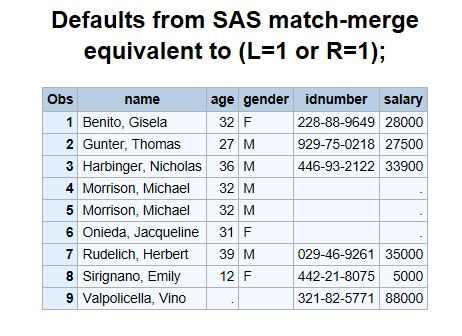

In [3]:
Image(filename='Anaconda3\\output\\default_match_merge.JPG')

Construct the DataFrames 'left' containing demographic information for employees and 'right' containing salary information.  They are replicates of the SAS data sets 'left' and 'right' used with the SAS program above.

In [4]:
left = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', 'Benito, Gisela', 'Rudelich, Herbert', \
                              'Sirignano, Emily', 'Morrison, Michael', 'Morrison, Michael', 'Onieda, Jacqueline'],
                     'age':          [27, 36, 32, 39, 22, 32, 32, 31],
                     'gender':       ['M', 'M', 'F', 'M', 'F', 'M', 'M', 'F']})

right = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', \
                               'Benito, Gisela','Rudelich, Herbert', 'Sirignano, Emily', 'Valpolicella, Vino'],
                      'id':           ['929-75-0218', '446-93-2122', \
                                       '228-88-9649', '029-46-9261', '442-21-8075', '321-82-5771'], 
                      'salary':      [27500, 33900, 28000, 35000, 5000, 80000]})

In [5]:
display("left", "right")

,age,gender,name
0,27,M,"Gunter, Thomas"
1,36,M,"Harbinger, Nicholas"
2,32,F,"Benito, Gisela"
3,39,M,"Rudelich, Herbert"
4,22,F,"Sirignano, Emily"
5,32,M,"Morrison, Michael"
6,32,M,"Morrison, Michael"
7,31,F,"Onieda, Jacqueline"
,id,name,salary
0,929-75-0218,"Gunter, Thomas",27500


panda uses two main constructs for joing and merging dataframes.  There is the <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html#merge-join-and-concatenate"> concat </a> function and the Database-style <a href="http://pandas.pydata.org/pandas-docs/stable/merging.html#database-style-dataframe-joining-merging"> join/merge </a> operations with syntax similar to SQL.

The examples below use the Database-style join/merge operations.  An example of the pd.concat() method is found <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Concatenating-DataFrames-(Join)"> here</a>.

Consider the SAS log below.  It shows 7 different output data sets created in a single Data Step.  Each are produced below with panda.  

````
    /******************************************************/
    /* c07_create_all_data_sets.sas                       */
    /******************************************************/
    26      data both
    27           right
    28           left
    29           allrows
    30           nomatchl
    31           nomatchr
    32           nomatch;
    33      
    34            merge left(in=l)
    35                   right(in=r);
    36            by name;
    37      
    38      if (l=l and r=1) then output both; *Inner Join;
    39      
    40      if r = 1 then output right; * Right Outer Join;
    41      
    42      if l = 1 then output left;  * Left Outer Join;
    43      
    44      if (l=1 or r=1) then output allrows; *Full Outer Join;
    45      
    46      if (l=0 and r=1) then output nomatchl;
    47      
    48      if (l=1 and r=0) then output nomatchr;
    49      
    50      if (l=0 or r=0) then output nomatch;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.both" has 6 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.right" has 6 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.left" has 8 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.allrows" has 9 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatchl" has 1 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatchr" has 3 observation(s) and 5 variable(s)
    NOTE: Data set "WORK.nomatch" has 4 observation(s) and 5 variable(s)
````

## Inner Join
### If (L=1 and R=1);

An INNER JOIN selects only those rows whose key values are found in both tables.  Another way to say this is the intersection of key values.

````
    /******************************************************/
    /* c07_inner_join.sas                                 */
    /******************************************************/
    37       proc sql;
    38          select monotonic() as row_num
    39                ,*
    40       
    41        from left, right
    42        where left.name = right.name;
````

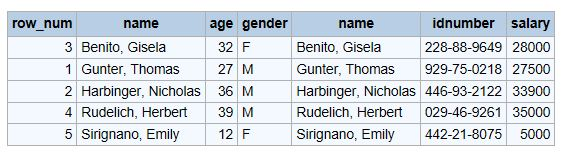

In [6]:
Image(filename='Anaconda3\\output\\inner_join.JPG')

With the panda merge() method, how='inner' is the analog to the SAS example above.

The panda 'how' argument for the merge() method specifies which keys are to be included in the output table. If a key combination does not appear in either the left or right table then values in the joined table will be NaN for missing.  This is the same as the SAS sort/merge example above. 

Use the how='inner' argument for an INNER JOIN.  This retrieves the intersection of key values from the 'left' and 'right' DataFrames.

In [7]:
both = pd.merge(left, right, on='name', how='inner', sort=True)

In [8]:
both

,age,gender,name,id,salary
0,32,F,"Benito, Gisela",228-88-9649,28000
1,27,M,"Gunter, Thomas",929-75-0218,27500
2,36,M,"Harbinger, Nicholas",446-93-2122,33900
3,39,M,"Rudelich, Herbert",029-46-9261,35000
4,22,F,"Sirignano, Emily",442-21-8075,5000


The SAS Data Step eqivalent of an Inner Join.
    
    data both;
    merge left(in=l)
          right(in=r);
    by name;
    
    if (l=1 and r=1) then output both;
    

## Right Outer Join
### if R = 1;

PROC SQL Right Outer Join example.

````
    /******************************************************/
    /* c07_right_outer_join.sas                           */
    /******************************************************/
    38       proc sql;
    39       create table r_outer(drop=old_name) as
    40          select monotonic() as row_num
    41                ,coalesce(left.old_name, right.old_name) as name
    42                ,*
    43          from left (rename=(name=old_name))
    44          right join
    45          right (rename=(name=old_name))
    46        on left.old_name = right.old_name;
    47       
    48        select *
    49        from r_outer;
    50        quit;
````

The COALESCE function coerces the 'name' variable into a single column.  The 'name' column is renamed 'old_name' to provide a join key and is then dropped.  

To produce the output above a second SELECT statement is used to display the single 'name' column in the output.

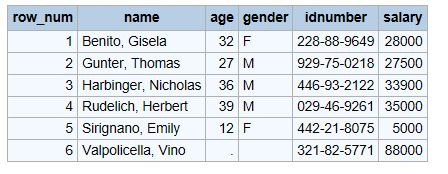

In [9]:
Image(filename='Anaconda3\\output\\right_outer.JPG')

For panda use the how='right' argument for a Right Outer Join.  This returns only those key values found in the 'right' DataFrame with corresponding matches found the 'left' DataFrame.

In [10]:
r_outer = pd.merge(left, right, how='right', sort=True)

In [11]:
r_outer

,age,gender,name,id,salary
0,32.0,F,"Benito, Gisela",228-88-9649,28000
1,27.0,M,"Gunter, Thomas",929-75-0218,27500
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900
3,39.0,M,"Rudelich, Herbert",029-46-9261,35000
4,22.0,F,"Sirignano, Emily",442-21-8075,5000
5,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000


The SAS Data Step equivalent of a RIGHT Outer Join.

````
    78       data r_outer;
    79           merge left(in=l)
    80                 right(in=r);
    81       
    82       if r = 1;
````

## Left Outer Join
### If L = 1;

PROC SQL Left Outer Join example.  See the SAS SQL Right Outer Join example <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#Right-Outer-Join"> above</a> to use the COALESCE function to coerce the name column contributed by both both tables into a single column.

````
    /******************************************************/
    /* c07_left_outer_join.sas                            */
    /******************************************************/
    29       proc sql;
    30          select monotonic() as row_num
    31                ,*
    32          from
    33             left
    34          left join
    35             right
    36        on left.name = right.name;
    37       
    38        quit;
````

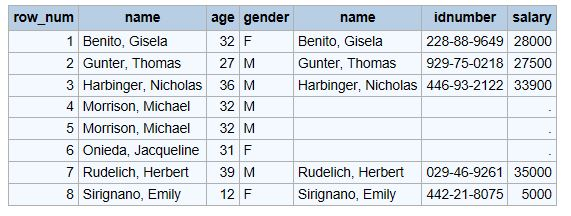

In [12]:
Image(filename='Anaconda3\\output\\left_outer.JPG')

For panda use the how='left' argument for a LEFT OUTER JOIN.  This returns only those key values found in the 'left' DataFrame with corresponding matches found the 'right' DataFrame.

In [13]:
l_outer = pd.merge(left, right, how='left', sort=True)

In [14]:
l_outer

,age,gender,name,id,salary
0,32,F,"Benito, Gisela",228-88-9649,28000.0
1,27,M,"Gunter, Thomas",929-75-0218,27500.0
2,36,M,"Harbinger, Nicholas",446-93-2122,33900.0
3,32,M,"Morrison, Michael",NaN,NaN
4,32,M,"Morrison, Michael",NaN,NaN
5,31,F,"Onieda, Jacqueline",NaN,NaN
6,39,M,"Rudelich, Herbert",029-46-9261,35000.0
7,22,F,"Sirignano, Emily",442-21-8075,5000.0


The SAS Data Step equivalent of a Left Outer Join.

````    
    73      data l_outer;
    74          merge left(in=l)
    75                right(in=r);
    76      
    77      if l = 1;
````

## Full Outer Join
### If (L=1 or R=1);

PROC SQL Full Outer Join exanple.  This is the default behavior for the SORT/MERGE example located at the <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2007%20--%20Pandas%2C%20Part%202.ipynb#SAS-Sort-Merge-with-by-group"> beginning</a> of this notebook.

````
    /******************************************************/
    /* c07_full_outer_join.sas                            */
    /******************************************************/
    6       proc sql;
    7       create table sas_merge(drop=old_name) as
    8       select monotonic() as obs
    9             ,coalesce(left.old_name, right.old_name) as name
    10             ,*
    11          from left (rename=(name=old_name))
    12       full join right (rename=(name=old_name))
    13           on left.old_name = right.old_name;
    14       
    15       select * from sas_merge;   
````

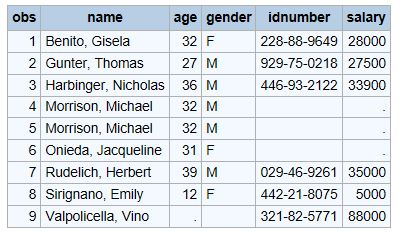

In [15]:
Image(filename='Anaconda3\\output\\full_outer_join.JPG')

In [16]:
merge_both = pd.merge(left, right, on='name', how='outer', sort=True)

In [17]:
merge_both

,age,gender,name,id,salary
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0
3,32.0,M,"Morrison, Michael",NaN,NaN
4,32.0,M,"Morrison, Michael",NaN,NaN
5,31.0,F,"Onieda, Jacqueline",NaN,NaN
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0


A Full Outer Join is the default behavior for a SAS 'Sort-Merge' with a by-group except in the case of a many-to-many join (see below).  It combines all observations from both data sets.  Said another way, the UNION of all values from both datasets.  

This is also the equivalent to setting the MERGE IN= flag as:

    if (L=1 or R=1) then output merge_both;

````
    34       proc sort data=left;
    35          by name;
    36       
    37       proc sort data=right;
    38          by name;
    39       
    40       data merge_both;
    41       merge left
    42             right;
    43          by name;

    NOTE: 8 observations were read from "WORK.left"
    NOTE: 6 observations were read from "WORK.right"
    NOTE: Data set "WORK.merge_both" has 9 observation(s) and 5 variable(s)
````

## Outer Join no Matched Keys
### if (L=0 or R=0); 

The examples above illustrate joining strategies based on matched key values in the data to be joined.  The next three examples illustrate joining data where keys are not matched.  

Every SQL join is either a Cartesian product join or a sub-set of the Cartesian product join.  Thus requiring a different approach to cases involving non-matched key values.   Some form of WHERE processing is required.  This is where the SAS Data Step with its IN= processing logic is a common pattern.  

PROC SQL can be used as well.

The next three examples use panda's indicator= argument to the pd.merge() method as an analog to the SAS IN= flag.  

For panda the WHERE processing filters utilize <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> boolean comparisons</a>.

Start with the SAS Data Step for no matched keys in either the 'left' or 'right' data sets. 

````
    /******************************************************/
    /* c07_nomatch_left_or_right.sas                      */
    /******************************************************/
    45      data nomatch;
    46            merge left(in=l)
    47                   right(in=r);
    48            by name;
    49      
    50      if (l=0 or r=0);
    51      
    52      title1 "if (L=0 or R=0)";
````        

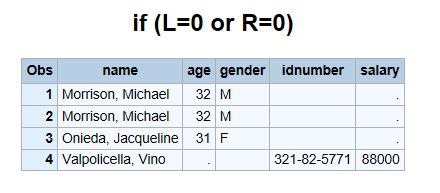

In [18]:
 Image(filename='Anaconda3\\output\\nomatch.JPG')

panda provisions the indicator= argument to the pd.merge() method.  The indicator argument can be a column name which takes on 1 of 3 possible values:

    left_only
    right_only
    both
    
By applying a boolean filter in conjunction with these values, we can replicate the behaviors for the SAS IN= flag for MERGEs.  

Construct the 'nomatch' DataFrame with an Outer Join using the ['name'] column as the join key for both.

In [19]:
nomatch = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

The 'nomatch' DataFrame displays the nomatch['in= '] column values.  These values are tested with boolean comparisons for the WHERE processing.

In [20]:
nomatch

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Using <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2005%20--%20Understanding%20Indexes.ipynb#Mixing-.loc-Indexer-with-Boolean-Operators"> boolean logic</a> and the logical 'or' (|) comparison, select those rows with the value 'left_only' and 'right_only'.

In [21]:
nomatch[(nomatch['in='] == 'left_only') | (nomatch['in='] == 'right_only')]

,age,gender,name,id,salary,in=
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Brievity allows:

In [22]:
nomatch[nomatch["in="] != 'both']

,age,gender,name,id,salary,in=
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


## Outer Join no Matched Keys in Right

Locate the key value rows in the 'right' data set which have no corresponding match in the 'left' data set.

````  
    /******************************************************/
    /* c07_nomatch_right.sas                              */
    /******************************************************/
    12      data nomatchr;
    13            merge left(in=l)
    14                   right(in=r);
    15            by name;
    16      
    17      if (l=0 and r=1);
    18      
     
````

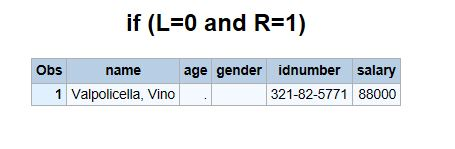

In [23]:
 Image(filename='Anaconda3\\output\\nomatch_in_right.JPG')

Locate the rows in the 'right' DataFrame which have no corresonding key value matches in the 'left' DataFrame.

In [24]:
nomatch_r = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

Display 'nonatch_r' DataFrame as the result of an Outer Join.

In [25]:
nomatch_r

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Use a boolean comparison to find key value rows contributed by the 'right' DataFrame.  In other words, key values in the 'right' DataFrame not found in the 'left' DataFrame.

In [26]:
nomatch_r[nomatch_r['in='] == 'right_only']

,age,gender,name,id,salary,in=
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


The non-matching key value rows from the 'right' DataFrame can also be sub-setted from the 'nomatch' DataFrame created above with:

In [27]:
nomatch[nomatch['in='] == 'right_only']

,age,gender,name,id,salary,in=
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


## Outer Join no Matched Keys in Left

Locate the key value rows in the 'left' data set having no corresonding match in the 'right' data set.

````
    /******************************************************/
    /* c07_nomatch_left.sas                               */
    /******************************************************/
    96      data nomatchl;
    97            merge left(in=l)
    98                   right(in=r);
    99            by name;
    100      
    101      if (l=1 and r=0);
    102      
````

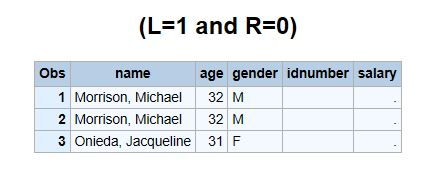

In [28]:
Image(filename='Anaconda3\\output\\nomatch_in_left.JPG')

Locate the key value rows in the 'left' DataFrame which have no corresonding matches in the 'right' DataFrame.

In [29]:
nomatch_l = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

Display 'nonatch_r' DataFrame as the result of an Outer Join.

In [30]:
nomatch_l

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",321-82-5771,80000.0,right_only


Use a boolean comparison to find key values rows contributed by the 'left' DataFrame only.  In other words key values in the 'left' DataFrame not found in the 'right' DataFrame.

In [31]:
nomatch_l[nomatch_l['in='] == 'left_only']

,age,gender,name,id,salary,in=
3,32.0,M,"Morrison, Michael",NaN,NaN,left_only
4,32.0,M,"Morrison, Michael",NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only


## Many-to-Many Join

Construct the DataFrames with duplicate ['name'] column values in each. 

In [32]:
left = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', 'Benito, Gisela', 'Rudelich, Herbert', \
                              'Sirignano, Emily', 'Morrison, Michael', 'Morrison, Michael', 'Onieda, Jacqueline'],
                     'age':          [27, 36, 32, 39, 22, 32, 32, 31],
                     'gender':       ['M', 'M', 'F', 'M', 'F', 'M', 'M', 'F']})

right = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', \
                               'Benito, Gisela','Rudelich, Herbert', 'Sirignano, Emily', 'Valpolicella, Vino', \
                                'Morrison, Michael', 'Morrison, Michael'],
                      'id':           ['929-75-0218', '446-93-2122', \
                                       '228-88-9649', '029-46-9261', '442-21-8075', '321-82-5771', \
                                       '222-33-4444', '222-33-4444'], 
                      'salary':      [27500, 33900, 28000, 35000, 5000, 80000, 75000, 75000]})

In [33]:
display("left", "right")

,age,gender,name
0,27,M,"Gunter, Thomas"
1,36,M,"Harbinger, Nicholas"
2,32,F,"Benito, Gisela"
3,39,M,"Rudelich, Herbert"
4,22,F,"Sirignano, Emily"
5,32,M,"Morrison, Michael"
6,32,M,"Morrison, Michael"
7,31,F,"Onieda, Jacqueline"
,id,name,salary
0,929-75-0218,"Gunter, Thomas",27500


Construct the 'm2m' DataFrame with an Outer Join using the 'left' and 'right' DataFrames on the ['name']' column.

In [34]:
m2m = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

Display the 'm2m' DataFrame.

In [35]:
m2m

,age,gender,name,id,salary,in=
0,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",222-33-4444,75000.0,both
4,32.0,M,"Morrison, Michael",222-33-4444,75000.0,both
5,32.0,M,"Morrison, Michael",222-33-4444,75000.0,both
6,32.0,M,"Morrison, Michael",222-33-4444,75000.0,both
7,31.0,F,"Onieda, Jacqueline",NaN,NaN,left_only
8,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both
9,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both


The PROC SQL illustrating a many-to-many Outer Join. 

````
    /******************************************************/
    /* c07_many_2_many_join.sas                           */
    /******************************************************/
    6      proc sql;
    7      create table m2m(drop=old_name) as
    8      select monotonic() as obs
    9            ,coalesce(left.old_name, right.old_name) as name
    10            ,*
    11         from left (rename=(name=old_name))
    12      full join right (rename=(name=old_name))
    13          on left.old_name = right.old_name;
    14      
    15      select * from m2m;
````

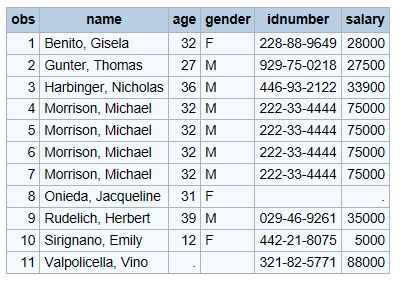

In [36]:
Image(filename='Anaconda3\\output\\many_2_many.JPG')

The SAS Data Step using the equivalent Full Outer Join with (L=1 or R=1) for the IN= option for MERGE does not produce the same results as PROC SQL in the case of a many-to-many join.  The SAS NOTE in the log 'At least one BY group was repeated in multiple datasets while merging' is an indication you may not be producing the desired results.

````
    /******************************************************/
    /* c07_many_2_many_join.sas                           */
    /******************************************************/
    17      proc sort data = left;
    18         by name;
    19      
    20      proc sort data = right;
    21         by name;
    22      
    23      data m2m;
    24         merge left(in=l)
    25               right(in=r);
    26         by name;
    27      if (l=1 or r=1);
    NOTE: At least one BY group was repeated in multiple datasets while merging
    28      
    29      proc print data=m2m;
````

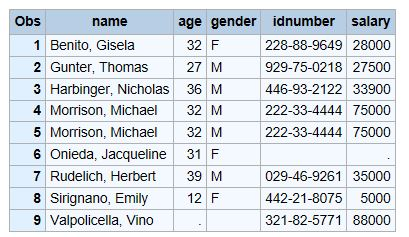

In [37]:
Image(filename='Anaconda3\\output\\m2m_datastep_merge.JPG')

## Group by: split-apply-combine Introduction

To illustrate the capabilities of panda group add the additional column in the 'left' DataFrame left['status'] as an additional categorical column.

In [38]:
left = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', 'Benito, Gisela', 'Rudelich, Herbert', \
                              'Sirignano, Emily', 'Morrison, Michael', 'Morrison, Michael', 'Onieda, Jacqueline'],
                     'age':          [27, 36, 32, 39, 22, 32, 32, 31],
                     'gender':       ['M', 'M', 'F', 'M', 'F', 'M', 'M', 'F'],
                     'status':       ['Pro', 'Amature', 'Amature', 'Pro', 'Amature', 'Amature', 'Pro', 'Pro']})

right = pd.DataFrame({'name': ['Gunter, Thomas', 'Harbinger, Nicholas', \
                               'Benito, Gisela','Rudelich, Herbert', 'Sirignano, Emily', 'Valpolicella, Vino'],
                      'id':           ['929-75-0218', '446-93-2122', \
                                       '228-88-9649', '029-46-9261', '442-21-8075', '321-82-5771'], 
                      'salary':      [27500, 33900, 28000, 35000, 5000, 80000]})

Data if often collected at one level with analysis needed at a different level.  For example, retailers collect data from invidiauls and need to aggregate to the household level.  Group by involves data splitting to create sub-populations and applying functions or transformation.  Then re-combining the grouped results into a single set of data. 

GroupBy is analogous to SAS BY group processing.  More details on panda's GroupBy are located in <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2010%20--%20Groupby.ipynb"> Chapter 10--GroupBy</a>.

## Replace Missing Values with Group Means

The steps for replacing values with a group mean below are:
    1. Construct the 'df' DataFrame
    2. Drop duplicates values for df['name'] column
    3. Create the grouper 'gb1' grouping df['gender'] column values
    4. Define the function 'func' to call the .fillna missing method & replace missing values with the group mean
    5. Extract the transformed trans['salary'] column as the new df['salary'] column.

    1. Construct the 'df DataFrame

Outer Join to contruct the 'df' DataFrame on the ['name'] key value column.

In [39]:
df = pd.merge(left, right, on='name', how='outer', sort=True, indicator='in=')

    2. Drop duplicate rows using the 'df['name'] column values. 

In [40]:
df = df.drop_duplicates('name')

Display the 'df' DataFrame containing missing (NaN) values for the df['salary'] column.

In [41]:
df

,age,gender,name,status,id,salary,in=
0,32.0,F,"Benito, Gisela",Amature,228-88-9649,28000.0,both
1,27.0,M,"Gunter, Thomas",Pro,929-75-0218,27500.0,both
2,36.0,M,"Harbinger, Nicholas",Amature,446-93-2122,33900.0,both
3,32.0,M,"Morrison, Michael",Amature,NaN,NaN,left_only
5,31.0,F,"Onieda, Jacqueline",Pro,NaN,NaN,left_only
6,39.0,M,"Rudelich, Herbert",Pro,029-46-9261,35000.0,both
7,22.0,F,"Sirignano, Emily",Amature,442-21-8075,5000.0,both
8,NaN,NaN,"Valpolicella, Vino",NaN,321-82-5771,80000.0,right_only


Missing value replacement can be approached with a range a methods described <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Missing-Value-Replacement"> here</a> in detail.  Create the 'gb1' Series.

In [42]:
gb1 = df.groupby('gender')['salary'].mean()

Display the Series df['salary'] values grouped by df['gender'] values.

In [43]:
gb1

gender
F    16500.000000
M    32133.333333
Name: salary, dtype: float64

PROC SQL illustrating the aggregation method (mean) grouped by the gender column.  The \_null\_ data step is used to print values to the SAS log.

````
    /******************************************************/
    /* c07_merge_both_groupby_mean_salary.sas             */
    /******************************************************/
    30       proc sql;
    31          create table sal_by_gender as
    32          select gender, mean(salary) as mean_sal
    33          from left as l,
    34               right as r
    35          where l.name = r.name
    36          group by gender;
    NOTE: Data set "WORK.sal_by_gender" has 2 observation(s) and 2 variable(s)
    37       quit;
    38       
    39       data _null_;
    40          set sal_by_gender;
    41          put _all_;

    _N_=1 _ERROR_=0 gender=F mean_sal=16500
    _N_=2 _ERROR_=0 gender=M mean_sal=32133.333333
````

    3. Create the DataFrameGroupBy (grouper) object from the df['gender'] column.

In [44]:
gb2 = df.groupby('gender')

.count() attribute used to return the number of unique levels from the group.

In [45]:
gb2.count()

,age,name,status,id,salary,in=
gender,,,,,,
F,3,3,3,2,2,3
M,4,4,4,3,3,4


    4. Define the 'func' function.
    
Lambda x is a short-hand for defining a function using the local variable x.  The argument to .fillna method defines a call replacing the missing values with the .mean() attribute. The function is defined and is called in step 5 below.

More examples on handling and replacing missing data are located <a  href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2004%20--%20Pandas%2C%20Part%201.ipynb#Missing-Value-Replacement"> here. </a>

In [46]:
func = lambda x: x.fillna(x.mean())
type(func)

function

Apply (or call) the defined function using the groupby.transform() attribute creating the new DataFrame 'trans'.  The .transform() attribute is applied to ints and floats to replace missing values with their respective column group mean. 

In [47]:
trans = gb2.transform(func)

     5. Extract the transformed trans['salary'] column as the new df['salary'] column
We just need the transformed trans['salary'] values to replace the original df['salary'] column values.  More details on DROP, KEEP, and RENAME columns is described <a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/blob/master/Chapter%2012%20--%20Additional%20Data%20Handling%20.ipynb#Drop/Keep-Columns"> here</a>. 

In [48]:
df["salary"] = trans["salary"]

Display the 'df' DataFrame with df['salary'] column values replaced with their group mean value.

In [49]:
df

,age,gender,name,status,id,salary,in=
0,32.0,F,"Benito, Gisela",Amature,228-88-9649,28000.000000,both
1,27.0,M,"Gunter, Thomas",Pro,929-75-0218,27500.000000,both
2,36.0,M,"Harbinger, Nicholas",Amature,446-93-2122,33900.000000,both
3,32.0,M,"Morrison, Michael",Amature,NaN,32133.333333,left_only
5,31.0,F,"Onieda, Jacqueline",Pro,NaN,16500.000000,left_only
6,39.0,M,"Rudelich, Herbert",Pro,029-46-9261,35000.000000,both
7,22.0,F,"Sirignano, Emily",Amature,442-21-8075,5000.000000,both
8,NaN,NaN,"Valpolicella, Vino",NaN,321-82-5771,80000.000000,right_only


## FIRST.variable and LAST.variable

The .first() attribute chained to a GroupBy for the df['status'] column as an analog to SAS' By Group processing using FIRST.variable and LAST.variable.

In [55]:
df.groupby('status').first()

,age,gender,name,id,salary,in=
status,,,,,,
Amature,32.0,F,"Benito, Gisela",228-88-9649,28000.0,both
Pro,27.0,M,"Gunter, Thomas",929-75-0218,27500.0,both


In [56]:
df.groupby('status').last()

,age,gender,name,id,salary,in=
status,,,,,,
Amature,22.0,F,"Sirignano, Emily",442-21-8075,5000.0,both
Pro,39.0,M,"Rudelich, Herbert",029-46-9261,35000.0,both


## Resources

MERGING vs. JOINING: Comparing the DATA Step with SQL, by Malachy J. Foley, University of North Carolina at Chapel Hill, located <a href="http://www2.sas.com/proceedings/sugi30/249-30.pdf"> here</a>.

pandas.DataFrame.merge() method documumented <a href="<http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.merge.html"> here</a>.

pandas Group By: split-apply-combine located <a href="http://pandas.pydata.org/pandas-docs/stable/groupby.html"> here</a>.

SAS 9.2 SQL Procedure User's Guide located <a href="http://support.sas.com/documentation/cdl/en/sqlproc/62086/HTML/default/viewer.htm"> here</a>.

Combining SAS Data Sets: Methods: in the SAS Language Reference: Concepts Manual, Second Edition, found <a href="https://support.sas.com/documentation/cdl/en/lrcon/65287/HTML/default/viewer.htm#n1tgk0uanvisvon1r26lc036k0w7.htm"> here</a>.

## Navigation

<a href="http://nbviewer.jupyter.org/github/RandyBetancourt/PythonForSASUsers/tree/master/"> Return to Chapter List </a>    